In [5]:
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
import random

# Trying 3 Dimensional Plot - Random Walk

In [10]:
def random_walker_3D(d=1,n_walker=1000):
    perm = permutations([d, d,d,-d,-d,-d], 3)
    all_combination=[]
    X=[]
    Y=[]
    Z=[]
    for i in list(perm):
        all_combination.append(i)    
    for j in range(n_walker):
        foo = random.choice(all_combination)
        x,y,z = foo 
        X.append(x)
        Y.append(y)
        Z.append(z)
    return np.cumsum(X),np.cumsum(Y),np.cumsum(Z)

In [15]:
x,y,z=random_walker_3D(n_walker=2000)

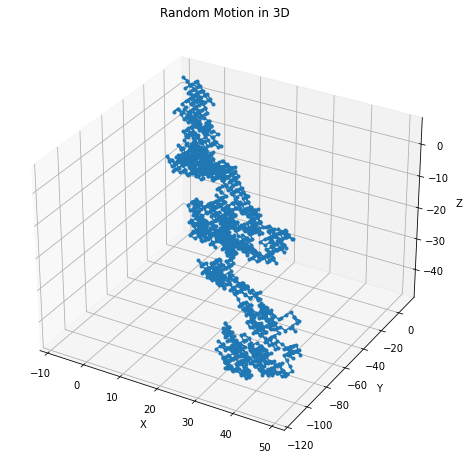

In [20]:
fig_3d = plt.figure(figsize = (10,8))
fig_3d.add_subplot(1,1,1,projection="3d")
ax = plt.gca()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(x,y,z, linestyle = '-', marker = '.')
plt.title('Random Motion in 3D');
plt.show()

# Individual Traj.

In [48]:
taj=1000
num_steps=1000
times=range(num_steps)
steps=[]
for i in range(taj):
    Ti=[]
    steps.append(Ti)
    for i in range(num_steps):
        toss=random.randint(1,2)
        if toss == 1:
            Ti.append(+1)
        else:
            Ti.append(-1)
trajs=np.cumsum(steps,axis=1)

Text(0.5, 0, 'time')

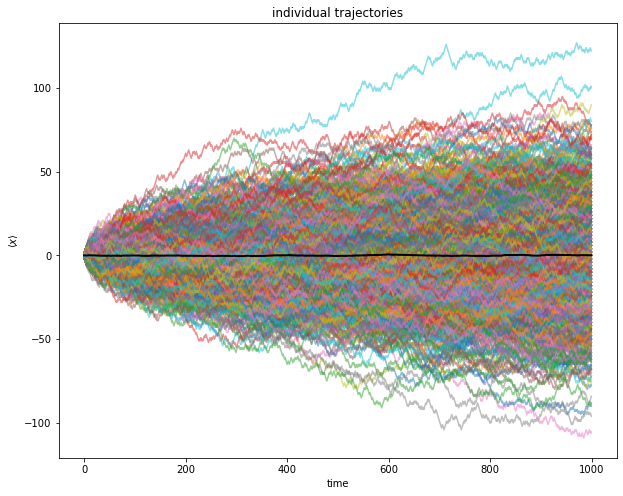

In [51]:
plt.figure(figsize=(10,8))
for traj in trajs:
    plt.plot(times,traj,alpha=0.5)
plt.plot(times,np.average(trajs,axis=0),color='black',lw=2)
plt.title('individual trajectories')
plt.ylabel(r'$\left<x\right>$')
plt.xlabel('time')

# Mean Squared displacement

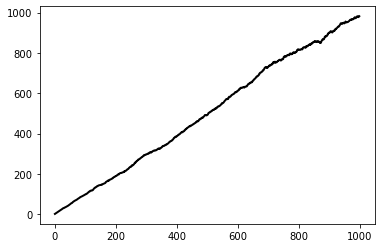

In [52]:
plt.plot(times,np.mean(trajs**2,axis=0) , linestyle ='-',label='data', lw = 2, color = 'black')

In [56]:
from scipy.optimize import curve_fit

In [58]:
def linear_model(x,m,c):
    return m*x+c

In [59]:
Sq=np.mean(trajs**2,axis=0)
para,_=curve_fit(linear_model,times,Sq)

In [61]:
m,c=para

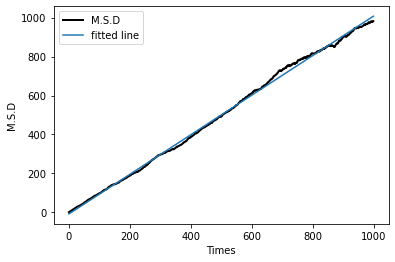

In [64]:
plt.plot(times,np.mean(trajs**2,axis=0) , linestyle ='-', lw = 2, color = 'black',label='M.S.D')
plt.plot(times,m*times+c,label='fitted line')
plt.xlabel('Times')
plt.ylabel('M.S.D')
plt.legend()